# Teclov Project

In [1]:
import pandas as pd
import numpy as np

# Problem 1 <- DATA CLEANING 

## Importing File

In [2]:
companies = pd.read_csv('C:/Users/Administrator/Desktop/Python/Teclov/Teclov/companies.txt',sep='\t',encoding='ansi')

In [3]:
## Checking for null alues
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
## Getting name of the company and dropping permalink and name column from companies dataset
x = companies['permalink'].str.split('/',expand=True)
cols = ['Serial No','Org','Company']
x.columns=cols
x['Company'] = x['Company'].apply(lambda x: x.replace('-',''))
y = x['Company']
companies =companies.drop(['permalink','name'],axis=1)
companies['Company'] = y

In [6]:
## Converting Company column in lowercase.
companies['Company'] = companies.Company.str.lower()

In [7]:
companies.head()

,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Company
0,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,fame
1,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter
2,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,theoneoftheminc
3,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,06com
4,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004technologies


In [8]:
## Importing round2 dataframe
rounds2 = pd.read_csv('C:/Users/Administrator/Desktop/Python/Teclov/Teclov/rounds2.csv',encoding='ansi')

In [9]:
## Checking for null values in rounds2 dataframe
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [10]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [11]:
## Getting name of the company and dropping company_permalink column from round2 dataset
x = rounds2['company_permalink'].str.split('/',expand=True)
cols = ['Serial No','Org','Company']
x.columns=cols
x['Company'] = x['Company'].apply(lambda x: x.replace('-',''))
y = x['Company']
rounds2 = rounds2.drop('company_permalink',axis=1)
rounds2['Company'] = y

In [12]:
## Converting Company column of rounds2 dataframe in lowercase.
rounds2['Company'] = rounds2.Company.str.lower()

In [13]:
rounds2.head()

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Company
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,fame
1,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,qounter
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,qounter
3,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,theoneoftheminc
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,06com


### Q1. Number of Unique Companies present in round2 ?

In [14]:
rounds2.groupby('Company')['Company'].unique().count()   ### There are 66,292 unique companies present in round2 dataset

66290

### Q2. Number of Unique Companies present in companies ?

In [15]:
companies.Company.nunique()  ### There are 66,290 unique companies present in companies dataset

66290

### Q3. In the companies data frame, which column can be used as the unique key for each company?

In [16]:
## Unique key is the Company column.
companies.Company.unique()  

array(['fame', 'qounter', 'theoneoftheminc', ..., 'ã\x81eron', 'ã”asys2',
       'ä°novatiffreklamvetanä±tä±mhizmetleritic'], dtype=object)

### Q4. Are there any companies in the rounds2 ﬁle which are not present in companies? 

In [17]:
### No,There are no unique companies that are present in round2 dataset that are not present in companies dataset.
rounds2[~rounds2['Company'].isin(companies.Company)]  

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Company


### Q5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?
 

In [18]:
master_frame = pd.merge(companies,rounds2,how='left')
### There are 1,15,193 rows and 14 columns in our master_frame dataframe.
master_frame.shape  

(115200, 14)

In [19]:
## Checking for null values in master_frame.
master_frame.isnull().sum()

homepage_url                6162
category_list               3427
status                         0
country_code                8702
state_code                 10978
region                     10198
city                       10195
founded_at                 20585
Company                        0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83983
funded_at                      0
raised_amount_usd          20031
dtype: int64

In [20]:
# We are removing those entries where status is closed as there is no investment going to happen for these companies.
master_frame = master_frame[master_frame['status']!='closed']

In [21]:
#Checking for null values in 'raised_amount_usd' column of master_frame
master_frame[master_frame['raised_amount_usd'].isna()]

,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Company,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
1,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
5,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
14,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011,1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,NaN
17,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN,14all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN
18,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013,1618technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,NaN
19,http://www.1800dentist.com,Health and Wellness,operating,USA,CA,Los Angeles,Los Angeles,01-01-1986,1800dentist,/funding-round/5274aacc211163fc7c86539ce94bbacc,undisclosed,NaN,19-08-2010,NaN
33,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN
40,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,1000museumscom,/funding-round/6dcccfea326e6add866bf67aafb0a7df,convertible_note,NaN,01-12-2014,NaN
42,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,1000museumscom,/funding-round/adf2f3272af9f552b87e01f10f0b9234,venture,NaN,01-02-2014,NaN
51,http://www.1006.tv/,Games|Media,operating,CHN,22,Beijing,Beijing,01-01-2009,1006tv,/funding-round/a3631227d5232aa8c2303f252c4f1f87,angel,NaN,01-01-2011,NaN


In [22]:
## considering all null value rows from our dataframe as zero..
master_frame['raised_amount_usd'].fillna(0,inplace=True)
master_frame.raised_amount_usd.isnull().sum()

0

In [23]:
master_frame.shape

(106449, 14)

# Problem 2 <-  FUNDING TYPE ANALYSIS

### Q1. Most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) 

In [24]:
master_frame['funding_round_type'].unique() ### These are the unique funding_round_type that we have

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [25]:
## Checking for missing values in funding_round_type column of master_frame.
master_frame.funding_round_type.isna().sum()

0

In [26]:
## Checking for missing values in country_code column of master_frame.
master_frame.country_code.isna().sum()

6844

In [27]:
## Considering missing values of column country_code as zero.
master_frame['country_code'].fillna('0',inplace=True)
master_frame.country_code.isna().sum()

0

In [28]:
master_frame.groupby('funding_round_type')['funding_round_type'].count() #Mostly companies are investing in "Venture".

funding_round_type
angel                     5384
convertible_note          1731
debt_financing            6468
equity_crowdfunding       3185
grant                     2042
non_equity_assistance      182
post_ipo_debt              139
post_ipo_equity            579
private_equity            2105
product_crowdfunding       392
secondary_market            89
seed                     27969
undisclosed               4603
venture                  51581
Name: funding_round_type, dtype: int64

### Therefore 51,581 is the most representative value in our data which is for "Venture" type.

In [29]:
x = master_frame.query('funding_round_type == "venture" or funding_round_type == "seed" or funding_round_type == "angel" or funding_round_type == "private_equity"')
x.groupby('funding_round_type')['raised_amount_usd'].mean().between(5000000,15000000,inclusive=True)

funding_round_type
angel             False
private_equity    False
seed              False
venture            True
Name: raised_amount_usd, dtype: bool

### As it can be observed, the best investment type is Venture Type, we will proceed ahead with that only for further analysis.

- Creating a dataframe filtering master_frame with "Venture" investment type.

In [30]:
master_frame_venture = master_frame.query('funding_round_type == "venture"')
master_frame_venture.head()

,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Company,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,0.0
3,http://oneofthem.jp,Apps|Games|Mobile,operating,0,NaN,NaN,NaN,NaN,theoneoftheminc,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,06com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.0


In [31]:
## Checking for missing values.
master_frame_venture.isna().sum()

homepage_url                2543
category_list                721
status                         0
country_code                   0
state_code                  3142
region                      2904
city                        2904
founded_at                  9603
Company                        0
funding_round_permalink        0
funding_round_type             0
funding_round_code         22700
funded_at                      0
raised_amount_usd              0
dtype: int64

# Problem 3 <- COUNTRY ANALYSIS

### Q1.Top nine countries which have received the highest total funding ?

In [32]:
top9 = master_frame_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)
top9 = pd.DataFrame(top9)
top9 = top9.reset_index(inplace=False)
top9

,country_code,raised_amount_usd
0,USA,4.008023e+11
1,CHN,3.910177e+10
2,0,1.979664e+10
3,GBR,1.834651e+10
4,IND,1.409556e+10
5,CAN,8.839931e+09
6,FRA,6.775044e+09
7,ISR,6.503021e+09
8,DEU,6.061141e+09


### Q2. Identify the top three English-speaking countries in the data frame top9 ?

In [33]:
country_code = ['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN']

- Importing files of countries code and countries where english is an official language and finally merging both the files

In [34]:
a = pd.read_excel('C:/Users/Administrator/Desktop/Python/Teclov/Teclov/countries english official.xlsx')
b = pd.read_excel('C:/Users/Administrator/Desktop/Python/Teclov/Teclov/countries with codes.xlsx')
c = pd.merge(a,b)
c = c.drop('country_name',axis=1)

- Checking how many countries in our Top 9 dataframe have english as their official language

In [35]:
d = c[c['country_code'].isin(country_code)]   # There are 4 countries in our Top 9 dataframe that have english as official language.

In [36]:
e = pd.merge(top9,d,how='inner')   ### These are the countries that have english as an official language
e.sort_values('raised_amount_usd',ascending=False).head(3)     

,country_code,raised_amount_usd
0,USA,4.008023e+11
1,GBR,1.834651e+10
2,IND,1.409556e+10


### Q3. Top English-speaking country ?

In [37]:
e.sort_values('raised_amount_usd',ascending=False).iloc[0,:]

country_code                 USA
raised_amount_usd    4.00802e+11
Name: 0, dtype: object

### Q2. Second English-speaking country ?

In [38]:
e.sort_values('raised_amount_usd',ascending=False).iloc[1,:]

country_code                 GBR
raised_amount_usd    1.83465e+10
Name: 1, dtype: object

### Q4. Third English-speaking country ?

In [39]:
e.sort_values('raised_amount_usd',ascending=False).iloc[2,:]

country_code                 IND
raised_amount_usd    1.40956e+10
Name: 2, dtype: object

In [40]:
master_frame_venture.shape

(51581, 14)

### From our analysis till now, we can say that we know the three most investment-friendly countries and the most suited funding type i.e. "Venture" for Teclov.

# Problem 4 <- SECTOR ANALYSIS 1

### Q1. Extracting primary sector of category_list from companies dataframe ?

In [41]:
## Importing mapping dataset
mapping = pd.read_csv('C:/Users/Administrator/Desktop/Python/Teclov/Teclov/mapping.csv')

In [42]:
mapping.shape

(688, 10)

In [43]:
prim_sector = master_frame_venture['category_list'].str.split('|',n=1,expand=True)
prim_sector.head()

,0,1
0,Media,None
1,Application Platforms,Real Time|Social Network Media
3,Apps,Games|Mobile
4,Curated Web,None
5,Software,None


In [44]:
prim_sector.shape

(51581, 2)

In [45]:
# Filling the 'Primary_Sector' column with the extrated category values.
master_frame_venture['Primary_Sector']= prim_sector[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
## Checking for null values in category_list of mapping dataframe
mapping['category_list'].isnull().sum()

1

In [47]:
## Replacing 'NAN' value with 0.
mapping['category_list']=mapping['category_list'].str.replace('0','NaN')

In [48]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [49]:
## Using melt function to get all the columns(8 main sectors) as rows.
melted=pd.melt(mapping, id_vars=['category_list'],value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

In [50]:
# Filtering melted dataframe with value as 1
melted = melted.query('value == 1')
melted.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [51]:
# Changing column names
melted=melted.rename(columns={'category_list':'Primary_Sector','variable':'main_sector'})

In [52]:
# Dropping the value column as it is not necessary.
melted=melted.drop('value',axis=1)

In [53]:
# Creating a merged dataframe as melted_FT
master_FT = pd.merge(master_frame_venture,melted,on='Primary_Sector',how='inner')
master_FT.groupby('main_sector')['main_sector'].count()

main_sector
Automotive & Sports                          832
Blanks                                       721
Cleantech / Semiconductors                  9958
Entertainment                               2994
Health                                      4132
Manufacturing                               3552
News, Search and Messaging                  6360
Others                                     12015
Social, Finance, Analytics, Advertising     7607
Name: main_sector, dtype: int64

In [54]:
#We are removing Blank main sectors as those are having no part in our analysis.
master_FT = master_FT.query('main_sector != "Blanks"')
master_FT.head()

,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Company,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_Sector,main_sector
0,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment
3,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment
4,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,alldefdigital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment


In [55]:
# Now we have 8 main sectors.
master_FT.groupby('main_sector')['main_sector'].count()

main_sector
Automotive & Sports                          832
Cleantech / Semiconductors                  9958
Entertainment                               2994
Health                                      4132
Manufacturing                               3552
News, Search and Messaging                  6360
Others                                     12015
Social, Finance, Analytics, Advertising     7607
Name: main_sector, dtype: int64

In [56]:
master_FT.shape

(47450, 16)

# Problem 5 <- SECTOR ANALYSIS 2

In [57]:
# Copying only those company details for which investemnts have been been between 5 to 15 milions in a new Dataframe 'master_FT_5M_15M'. 
master_FT_5M_15M = master_FT[master_FT['raised_amount_usd'].between(5000000,15000000,inclusive=True)]

In [58]:
master_FT_5M_15M.shape

(14212, 16)

### Q1. Creating three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range with certain conditions

In [59]:
## Creating D1
D1 = master_FT_5M_15M.query('country_code == "USA" and 5000000<= raised_amount_usd <= 15000000')
D1 = D1.assign(count_of_invest =D1.groupby('main_sector')['main_sector'].transform('count'))
D1 = D1.assign(sum_of_invest =D1.groupby('main_sector')['raised_amount_usd'].transform('sum'))

In [60]:
## Creating D2
D2 = master_FT_5M_15M.query('country_code == "GBR" and 5000000<= raised_amount_usd <= 15000000')
D2 = D2.assign(count_of_invest =D2.groupby('main_sector')['main_sector'].transform('count'))
D2 = D2.assign(sum_of_invest =D2.groupby('main_sector')['raised_amount_usd'].transform('sum'))

In [61]:
## Creating D3
D3 = master_FT_5M_15M.query('country_code == "IND" and 5000000<= raised_amount_usd <= 15000000')
D3 = D3.assign(count_of_invest =D3.groupby('main_sector')['main_sector'].transform('count'))
D3 = D3.assign(sum_of_invest =D3.groupby('main_sector')['raised_amount_usd'].transform('sum'))

In [62]:
## Checking for null values in column 'main_sector' master_FT_5M_15M
master_FT_5M_15M[master_FT_5M_15M['main_sector'].isnull()]

,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Company,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_Sector,main_sector


In [63]:
D1.head()

,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Company,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_Sector,main_sector,count_of_invest,sum_of_invest
4,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,alldefdigital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment,521,4.510748e+09
14,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,chefsfeed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,Media,Entertainment,521,4.510748e+09
21,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,Media,Entertainment,521,4.510748e+09
22,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,Media,Entertainment,521,4.510748e+09
33,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5000000.0,Media,Entertainment,521,4.510748e+09


In [64]:
D2.head()

,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Company,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_Sector,main_sector,count_of_invest,sum_of_invest
1,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment,52,454411059.0
2,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment,52,454411059.0
85,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NaN,commoninterestcommunities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10000000.0,Application Platforms,"News, Search and Messaging",66,558500705.0
101,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,geospockltd,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,5460000.0,Application Platforms,"News, Search and Messaging",66,558500705.0
102,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,geospockltd,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5400000.0,Application Platforms,"News, Search and Messaging",66,558500705.0


In [65]:
D3.head()

,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Company,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_Sector,main_sector,count_of_invest,sum_of_invest
0,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment,32,272080000.0
254,http://chillr.in,Apps|Banking|Mobile Payments,operating,IND,13,Cochin,Cochin,22-12-2013,chillr2,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,A,02-10-2015,6000000.0,Apps,"News, Search and Messaging",51,423834545.0
404,https://jugnoo.in/#/,Apps|Social Business|Software,operating,IND,5,Chandigarh,Chandigarh,01-11-2014,jugnoo,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,A,05-06-2015,5000000.0,Apps,"News, Search and Messaging",51,423834545.0
521,http://www.peppertap.com,Apps|Groceries|Online Shopping,operating,IND,10,New Delhi,Gurgaon,26-11-2014,peppertap,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,A,14-04-2015,10000000.0,Apps,"News, Search and Messaging",51,423834545.0
671,http://tinyowl.com/,Apps|Mobile|Specialty Foods,operating,IND,16,Mumbai,Mumbai,NaN,tinyowltechnology,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,C,30-10-2015,7665775.0,Apps,"News, Search and Messaging",51,423834545.0


### Q2. Total number of investment of each country?

In [156]:
D1.count_of_invest.unique().sum() #USA

10421

In [157]:
D2.count_of_invest.unique().sum() #GBR

545

In [158]:
D3.count_of_invest.unique().sum() #INDIA

257

### Q3. Total amount of investment of each country?

In [69]:
D1.groupby('country_code')['sum_of_invest'].sum()

country_code
USA    1.710196e+14
Name: sum_of_invest, dtype: float64

In [70]:
D2.groupby('country_code')['sum_of_invest'].sum()

country_code
GBR    4.391079e+11
Name: sum_of_invest, dtype: float64

In [71]:
D3.groupby('country_code')['sum_of_invest'].sum()

country_code
IND    1.471166e+11
Name: sum_of_invest, dtype: float64

### Q4. Top sector (based on count of investments)? 

In [72]:
D1.groupby(['country_code','main_sector'])['count_of_invest'].count().sort_values(ascending=False).head(1)

country_code  main_sector
USA           Others         2735
Name: count_of_invest, dtype: int64

In [73]:
D2.groupby(['country_code','main_sector'])['count_of_invest'].count().sort_values(ascending=False).head(1)

country_code  main_sector
GBR           Others         137
Name: count_of_invest, dtype: int64

In [74]:
D3.groupby(['country_code','main_sector'])['count_of_invest'].count().sort_values(ascending=False).head(1)

country_code  main_sector
IND           Others         102
Name: count_of_invest, dtype: int64

### Q5. Second best sector (based on count of investments)? 

- USA

In [75]:
r = D1.groupby(['country_code','main_sector'])['count_of_invest'].count().sort_values(ascending=False)
x = r.reset_index(inplace=False)

In [76]:
x.iloc[1,:]

country_code                              USA
main_sector        Cleantech / Semiconductors
count_of_invest                          2146
Name: 1, dtype: object

- UK

In [77]:
r = D2.groupby(['country_code','main_sector'])['count_of_invest'].count().sort_values(ascending=False)
x = r.reset_index(inplace=False)

In [78]:
x.iloc[1,:]

country_code                              GBR
main_sector        Cleantech / Semiconductors
count_of_invest                           114
Name: 1, dtype: object

- INDIA

In [79]:
r = D3.groupby(['country_code','main_sector'])['count_of_invest'].count().sort_values(ascending=False)
x = r.reset_index(inplace=False)

In [80]:
x.iloc[1,:]

country_code                              IND
main_sector        News, Search and Messaging
count_of_invest                            51
Name: 1, dtype: object

### Q6. Third best sector (based on count of investments)? 

- USA

In [81]:
r = D1.groupby(['country_code','main_sector'])['count_of_invest'].count().sort_values(ascending=False)
x = r.reset_index(inplace=False)

In [82]:
x.iloc[2,:]

country_code                                           USA
main_sector        Social, Finance, Analytics, Advertising
count_of_invest                                       1817
Name: 2, dtype: object

- UK

In [83]:
r = D2.groupby(['country_code','main_sector'])['count_of_invest'].count().sort_values(ascending=False)
x = r.reset_index(inplace=False)

In [84]:
x.iloc[2,:]

country_code                                           GBR
main_sector        Social, Finance, Analytics, Advertising
count_of_invest                                         95
Name: 2, dtype: object

- INDIA

In [85]:
r = D3.groupby(['country_code','main_sector'])['count_of_invest'].count().sort_values(ascending=False)
x = r.reset_index(inplace=False)

In [86]:
x.iloc[2,:]

country_code                                           IND
main_sector        Social, Finance, Analytics, Advertising
count_of_invest                                         32
Name: 2, dtype: object

### Q7.  For the top sector count-wise , which company received the highest investment?
 

- USA

In [87]:
x = D1.query('main_sector == "Others"')
x.groupby(['country_code','Company'])['sum_of_invest'].sum().sort_values(ascending=False).head(1)

country_code  Company          
USA           blackducksoftware    1.466644e+11
Name: sum_of_invest, dtype: float64

- UK

In [88]:
x = D2.query('main_sector == "Others"')
x.groupby(['country_code','Company'])['sum_of_invest'].sum().sort_values(ascending=False).head(1)

country_code  Company
GBR           sensage    4.757769e+09
Name: sum_of_invest, dtype: float64

- INDIA

In [89]:
x = D3.query('main_sector == "Others"')
x.groupby(['country_code','Company'])['sum_of_invest'].sum().sort_values(ascending=False).head(1)

country_code  Company
IND           myntra     3.737158e+09
Name: sum_of_invest, dtype: float64

### Q8. For the second-best sector count-wise , which company received the highest investment?
 

- USA

In [90]:
x = D1.query('main_sector == "Cleantech / Semiconductors"')
y = x.groupby(['country_code','Company'])['sum_of_invest'].sum().sort_values(ascending=False).head()
z = y.reset_index(inplace=False)

In [91]:
z.iloc[1,:]

country_code             USA
Company           tigoenergy
sum_of_invest    1.57935e+11
Name: 1, dtype: object

- UK

In [92]:
x = D2.query('main_sector == "Cleantech / Semiconductors"')
y = x.groupby(['country_code','Company'])['sum_of_invest'].sum().sort_values(ascending=False).head()
z = y.reset_index(inplace=False)

In [93]:
z.iloc[1,:]

country_code                                                   GBR
Company          fstarbiotechnologischeforschungsundentwicklung...
sum_of_invest                                          3.08409e+09
Name: 1, dtype: object

- INDIA

In [94]:
x = D3.query('main_sector == "News, Search and Messaging"')
y = x.groupby(['country_code','Company'])['sum_of_invest'].sum().sort_values(ascending=False).head()
z = y.reset_index(inplace=False)

In [95]:
z.iloc[1,:]

country_code              IND
Company          bluestonecom
sum_of_invest     8.47669e+08
Name: 1, dtype: object

# PLOTS

### Q1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. 

Text(0.5, 1.0, 'Funding Type along with Count of Investments')

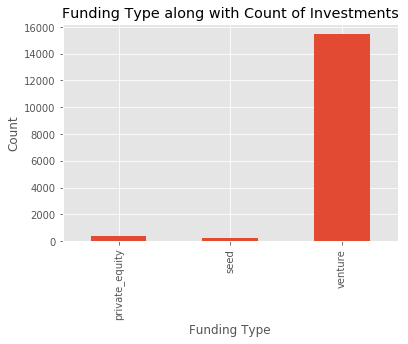

In [108]:
import matplotlib.pyplot as plt
x = master_frame.query('funding_round_type=="venture" or funding_round_type=="private_equity" or funding_round_type=="seed"')
#Applying condition on our master_frame as Teclov wants to invest between 5 million to 15 million.
y = x.query('5000000<= raised_amount_usd <= 15000000')
z = y.groupby('funding_round_type')['funding_round_type'].count()
#Lets plot the same on bar graph.
plt.style.use('ggplot')
z.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Funding Type')
plt.title('Funding Type along with Count of Investments')

Text(0.5, 1.0, 'Funding Type along with Mean Amount Invested')

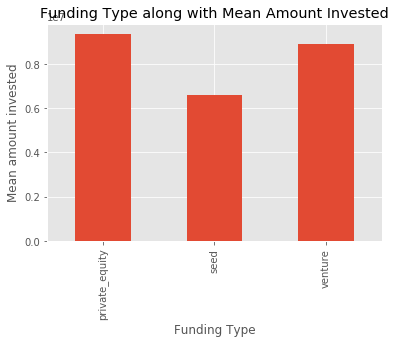

In [97]:
z = y.groupby('funding_round_type')['raised_amount_usd'].mean()
#Lets plot the same.
plt.style.use('ggplot')
z.plot(kind='bar')
plt.ylabel('Mean amount invested')
plt.xlabel('Funding Type')
plt.title('Funding Type along with Mean Amount Invested')

### From above we can analyze that "Venture" is the most suited type of investment for Teclov.

### Q2.A plot showing the top 9 countries against the total amount of investments of funding type FT.

Text(0.5, 1.0, 'Top 9 countries along with total investment')

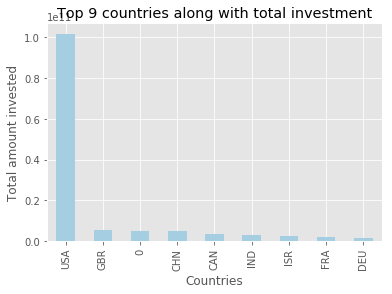

In [98]:
a = master_frame_venture.query('5000000<= raised_amount_usd <= 15000000')
x = a.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)
# Lets plot the same.
plt.style.use('ggplot')
x.plot(kind='bar',colormap='Paired')
plt.ylabel('Total amount invested')
plt.xlabel('Countries')
plt.title('Top 9 countries along with total investment')

In [99]:
### As Teclov wants to invest in english speaking country so we will be plotting with the same.

In [100]:
top9 = master_frame_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)
top9 = top9.reset_index(inplace=False)
top9

,country_code,raised_amount_usd
0,USA,4.008023e+11
1,CHN,3.910177e+10
2,0,1.979664e+10
3,GBR,1.834651e+10
4,IND,1.409556e+10
5,CAN,8.839931e+09
6,FRA,6.775044e+09
7,ISR,6.503021e+09
8,DEU,6.061141e+09


In [101]:
top3 = top9.query('country_code=="USA" or country_code=="IND" or country_code=="GBR"')
top3.set_index('country_code',inplace=True)

Text(0.5, 1.0, 'Top 9 countries along with total investment')

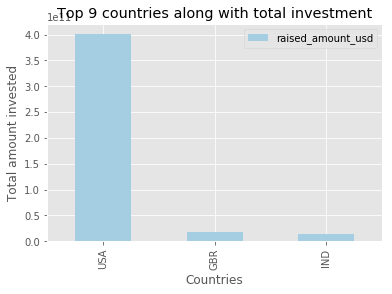

In [102]:
# Lets plot the same.
plt.style.use('ggplot')
top3.plot(kind='bar',colormap='Paired')
plt.ylabel('Total amount invested')
plt.xlabel('Countries')
plt.title('Top 9 countries along with total investment')

### Q3.A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [103]:
a = D1['main_sector'].value_counts().head(3)
a = pd.DataFrame(a)
a.reset_index(inplace=True)
a = a.rename(columns={'index':'Main_sector','main_sector':'count'})
lst = ['USA','USA','USA']
a['Country'] = lst
a

,Main_sector,count,Country
0,Others,2735,USA
1,Cleantech / Semiconductors,2146,USA
2,"Social, Finance, Analytics, Advertising",1817,USA


In [104]:
b = D2['main_sector'].value_counts().head(3)
b = pd.DataFrame(b)
b.reset_index(inplace=True)
b = b.rename(columns={'index':'Main_sector','main_sector':'count'})
lst = ['GBR','GBR','GBR']
b['Country'] = lst
b

,Main_sector,count,Country
0,Others,137,GBR
1,Cleantech / Semiconductors,114,GBR
2,"Social, Finance, Analytics, Advertising",95,GBR


In [105]:
c = D3['main_sector'].value_counts().head(3)
c = pd.DataFrame(c)
c.reset_index(inplace=True)
c = c.rename(columns={'index':'Main_sector','main_sector':'count'})
lst = ['INDIA','INDIA','INDIA']
c['Country'] = lst
c

,Main_sector,count,Country
0,Others,102,INDIA
1,"News, Search and Messaging",51,INDIA
2,Entertainment,32,INDIA


In [112]:
x = pd.merge(a,b,how='outer')
y = pd.merge(x,c,how='outer')
y

,Main_sector,count,Country
0,Others,2735,USA
1,Cleantech / Semiconductors,2146,USA
2,"Social, Finance, Analytics, Advertising",1817,USA
3,Others,137,GBR
4,Cleantech / Semiconductors,114,GBR
5,"Social, Finance, Analytics, Advertising",95,GBR
6,Others,102,INDIA
7,"News, Search and Messaging",51,INDIA
8,Entertainment,32,INDIA


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

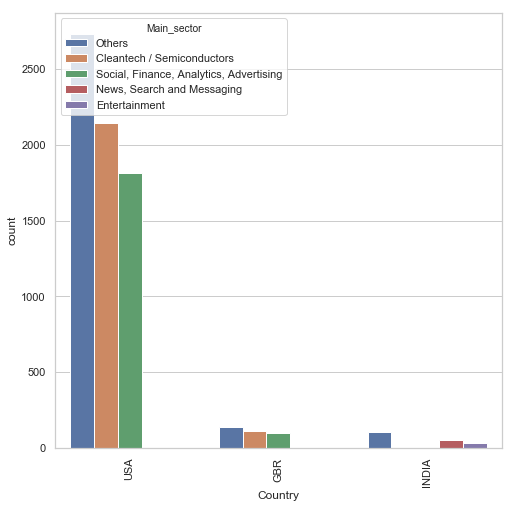

In [169]:
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
plt.figure(figsize=(8,8))
sns.barplot(x='Country',y=y['count'],hue='Main_sector',data=y)
plt.xticks(rotation=90)